In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Colab Notebooks/data/review_data/'

In [4]:
# Data 불러오기 및 Concat

data = ['Clash of Clan','Clash of Royal','CookieRunKingdom','GeoMetry123','LegendofSlime','듀엣캣',
        '무한의 계단','서머워즈너','우르르용병단','피파123']
result = pd.read_csv(path+'Clash of Clan.csv')
for i in  range(1,len(data)) : 
  file = data[i]
  df=pd.read_csv(path+file+'.csv')
  result = pd.concat([result,df])


In [5]:
# test Data
test = pd.read_csv(path+'탕탕특공대_Newest_Reviews.csv')
test.head()

,Unnamed: 0,name,reviews,score,year,month,day
0,0,HP LM,지겨워,1,2023,5,15
1,1,123 귀요미와 깜찍이,저 레벨 18이였는데 저절로 게임이 지워졌어요 그래서 다시해야하나 걱정이네요 이거 ...,1,2023,5,14
2,2,신지율,광고 수준 ㅉㅉ 역겹다 광고나 다시 찍어 뇌절겜아,1,2023,5,14
3,3,kyuseol kim,. 좀고쳐주세요너무어려어요!!!!!!!!!!!!!!!!!!!!!!좀!!!!!!!!!...,1,2023,5,14
4,4,임현정,좋은거같긴한데. 어려워서싫어요,1,2023,5,14


In [6]:
# index 재배열 및 불필요한 열 삭제
result= result.reset_index()
train_data = result.copy()
train_data.drop(['index','Unnamed: 0'],axis=1,inplace=True)
train_data

,name,reviews,score,year,month,day
0,김찬호,혹시 장인기지 와이파이 오류 문제는 고칠 생각이 없으신가요? 저 하나만 그런게 아니...,1,2023,5,21
1,아아,음 오랜만에 설치해서 잘 쓰고 있었는데.. 이번 업데이트 이후로 앱 들어가고 로딩 ...,1,2023,5,22
2,방천화극,이번 업데이트후 그동안 사용하던 부캐 두개를 연동하지 못하고 있네요... 인증번호 ...,1,2022,12,18
3,멍멍궁,이번 업데이트 후에 장인기지 하면 1스테이지 플레이 중간에 접속오류 뜨며 팅겨서 2...,1,2023,5,21
4,홍구와홍철 (홍구와홍철),장인 기지가 업데이트 이후 훨씬 재미 없어졌습니다. 본사에서 안 볼 확률이 높겠지만...,1,2023,5,15
...,...,...,...,...,...,...
791722,김도영,👍👍👍👍👍👍👍👍,5,2022,6,9
791723,정준우,👍👍👍👍👍👍👍👍👍,5,2023,3,11
791724,단두대 킬러,■ ■ ■ ■ ■,5,2021,4,1
791725,김명권,잼나잼나,5,2023,2,23


In [7]:
print('전체 리뷰 개수 :',len(train_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 791727


In [8]:
# Null값 제거 
print(train_data.isnull().sum())
train_data.dropna(how='any',inplace=True)
train_data.isnull().sum()
train_data

name         1
reviews    386
score        0
year         0
month        0
day          0
dtype: int64


,name,reviews,score,year,month,day
0,김찬호,혹시 장인기지 와이파이 오류 문제는 고칠 생각이 없으신가요? 저 하나만 그런게 아니...,1,2023,5,21
1,아아,음 오랜만에 설치해서 잘 쓰고 있었는데.. 이번 업데이트 이후로 앱 들어가고 로딩 ...,1,2023,5,22
2,방천화극,이번 업데이트후 그동안 사용하던 부캐 두개를 연동하지 못하고 있네요... 인증번호 ...,1,2022,12,18
3,멍멍궁,이번 업데이트 후에 장인기지 하면 1스테이지 플레이 중간에 접속오류 뜨며 팅겨서 2...,1,2023,5,21
4,홍구와홍철 (홍구와홍철),장인 기지가 업데이트 이후 훨씬 재미 없어졌습니다. 본사에서 안 볼 확률이 높겠지만...,1,2023,5,15
...,...,...,...,...,...,...
791722,김도영,👍👍👍👍👍👍👍👍,5,2022,6,9
791723,정준우,👍👍👍👍👍👍👍👍👍,5,2023,3,11
791724,단두대 킬러,■ ■ ■ ■ ■,5,2021,4,1
791725,김명권,잼나잼나,5,2023,2,23


In [9]:
#리뷰 전체길이 확인
train_length = train_data['reviews'].astype(str).apply(len)
train_length.head()

0    160
1    109
2    179
3    104
4     95
Name: reviews, dtype: int64

In [10]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 1418
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 27.93
리뷰 길이 표준편차: 48.28
리뷰 길이 중간값: 11.0
리뷰 길이 제1사분위: 4.0
리뷰 길이 제3사분위: 31.0


In [11]:
#test.head()
# index 재배열 및 불필요한 열 삭제
test = test.reset_index()
test_data = test.copy()
test_data.drop(['index','Unnamed: 0'],axis=1,inplace=True)
test_data

,name,reviews,score,year,month,day
0,HP LM,지겨워,1,2023,5,15
1,123 귀요미와 깜찍이,저 레벨 18이였는데 저절로 게임이 지워졌어요 그래서 다시해야하나 걱정이네요 이거 ...,1,2023,5,14
2,신지율,광고 수준 ㅉㅉ 역겹다 광고나 다시 찍어 뇌절겜아,1,2023,5,14
3,kyuseol kim,. 좀고쳐주세요너무어려어요!!!!!!!!!!!!!!!!!!!!!!좀!!!!!!!!!...,1,2023,5,14
4,임현정,좋은거같긴한데. 어려워서싫어요,1,2023,5,14
...,...,...,...,...,...,...
52923,박희만,완전 꿀잼이에요!!! 재밌게 하겠습니다,5,2022,8,10
52924,김진우,과금 유도가 적고 쉽고 재밌다 리얼임,5,2022,8,10
52925,송인재,재밋어요 시간잘감,5,2022,8,10
52926,쿠로하,괜찮네요,5,2022,8,10


In [12]:
# #test file 형식 맞추기
# test_data.rename(columns={'리뷰':'reviews','별점':'score','아이디':'name'},inplace=True)
# test_data

In [13]:
# 평점 Labeling
def labeling(x) : 
  if x>=3 : return 1
  else : return -1

In [14]:
train_data['label']=train_data['score'].apply(labeling)
test_data['label']= test_data['score'].apply(labeling)

In [15]:
# 리뷰 갯수 파악
print('train 긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('train 부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[-1]))

print('test 긍정 리뷰 갯수: {}'.format(test_data['label'].value_counts()[1]))
print('test 부정 리뷰 갯수: {}'.format(test_data['label'].value_counts()[-1]))


train 긍정 리뷰 갯수: 668516
train 부정 리뷰 갯수: 122824
test 긍정 리뷰 갯수: 46267
test 부정 리뷰 갯수: 6661


In [17]:
train_data['reviews'].nunique(), train_data['label'].nunique()

(550836, 2)

In [18]:
train_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 550836


In [19]:
print(train_data.isnull().values.any())

False


In [20]:
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 550836
테스트용 리뷰의 개수 : 52928


<Axes: >

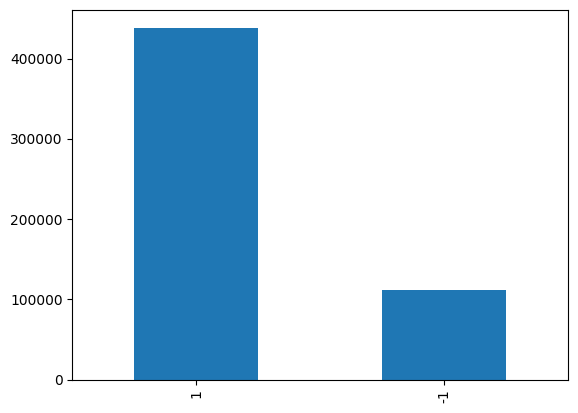

In [21]:
train_data['label'].value_counts().plot(kind = 'bar')

In [22]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

<ipython-input-22-5c91c21161d5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


name          0
reviews    3461
score         0
year          0
month         0
day           0
label         0
dtype: int64


In [23]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np. #nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 31720


<ipython-input-23-5968a3f5f2bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [24]:
train_data.head()

,name,reviews,score,year,month,day,label
0,김찬호,혹시 장인기지 와이파이 오류 문제는 고칠 생각이 없으신가요 저 하나만 그런게 아니라...,1,2023,5,21,-1
1,아아,음 오랜만에 설치해서 잘 쓰고 있었는데 이번 업데이트 이후로 앱 들어가고 로딩 퍼 ...,1,2023,5,22,-1
2,방천화극,이번 업데이트후 그동안 사용하던 부캐 두개를 연동하지 못하고 있네요 인증번호 자리를...,1,2022,12,18,-1
3,멍멍궁,이번 업데이트 후에 장인기지 하면 스테이지 플레이 중간에 접속오류 뜨며 팅겨서 스테...,1,2023,5,21,-1
4,홍구와홍철 (홍구와홍철),장인 기지가 업데이트 이후 훨씬 재미 없어졌습니다 본사에서 안 볼 확률이 높겠지만 ...,1,2023,5,15,-1


In [25]:
! python3 -m pip install --upgrade pip
! python3 -m pip install konlpy 
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 42.6 MB/s eta 0:00:00
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1314k      0  0:00:01  0:00:01 --:--:-- 3714k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-ko-0.9.2/example/example.c
mecab-0.996-ko-0.9.2/example/thread_test.cpp
mecab-0.996-ko-0.9.2/mecab-config.

In [26]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!cd Mecab-ko-for-Google-Colab && bash install_mecab-ko_on_colab190912.sh


Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 122 (delta 15), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (122/122), 1.27 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-05-30 01:32:13--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunje

In [27]:
!pip install mecab-python3
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 17.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import MeCab
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

mecab= MeCab.Tagger()

In [29]:
result = mecab.parse("한글 텍스트를 형태소 분석합니다.")
print(result)

한글	NNG,*,T,한글,*,*,*,*
텍스트	NNG,*,F,텍스트,*,*,*,*
를	JKO,*,T,를,*,*,*,*
형태소	NNG,*,F,형태소,Compound,*,*,형태/NNG/*+소/NNG/*
분석	NNG,행위,T,분석,*,*,*,*
합니다	XSV+EF,*,F,합니다,Inflect,XSV,EF,하/XSV/*+ᄇ니다/EF/*
.	SF,*,*,*,*,*,*,*
EOS



In [30]:
# type 변경(object->str)
train_data['reviews'] = train_data['reviews'].apply(lambda _: str(_))
test_data['reviews'] = test_data['reviews'].apply(lambda _: str(_))


<ipython-input-30-cb94fbaff8d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['reviews'] = test_data['reviews'].apply(lambda _: str(_))


In [31]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [32]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [33]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()

In [34]:
# 데이터 나누기
train_data.index = range(len(train_data))
num = len(train_data)//5
train_1 = train_data.iloc[:num]
train_2 = train_data.iloc[num:num*2]
train_3 = train_data.iloc[num*2:num*3]
train_4 = train_data.iloc[num*3:num*4]
train_5 = train_data.iloc[num*4:len(train_data)]

In [35]:
train_5['tokenized']=train_5['reviews'].apply(okt.morphs)
train_5.to_csv('train_5.csv')

<ipython-input-35-2e08e53c04f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_5['tokenized']=train_5['reviews'].apply(okt.morphs)


In [36]:
train_5

,name,reviews,score,year,month,day,label,tokenized
440668,Google 사용자,아디 못찾아서 다시 키운다,1,2017,10,28,-1,"[아디, 못, 찾아서, 다시, 키운다]"
440669,Google 사용자,게임이계속 이라고떠서 아무것도할수가없오요,1,2017,11,8,-1,"[게임, 이, 계속, 이, 라고, 떠서, 아무, 것, 도, 할수가, 없오요]"
440670,Google 사용자,게임이안틀어져요게속처음구글플레이그것만뜨는데어떻게들어가요게속안들어가져서하는말이에요빠른...,1,2017,11,14,-1,"[게임, 이안, 틀어져, 요게, 속, 처음, 구글플레이, 그것, 만, 뜨는데, 어떻..."
440671,Google 사용자,아니좀만드는거땜메 빡쳤어다신안해,1,2017,11,5,-1,"[아니, 좀, 만드는거, 땜메, 빡쳤어다, 신안해]"
440672,Google 사용자,개선점 하트일괄보내기 하트일괄보내기 하트일괄보내기 시탑 다음층 자동이동 던전 자동연...,1,2017,10,27,-1,"[개선, 점, 하트, 일괄, 보내기, 하트, 일괄, 보내기, 하트, 일괄, 보내기,..."
...,...,...,...,...,...,...,...,...
550831,김민서,뉘,5,2021,2,6,1,[뉘]
550832,무적의4남매tv,nan,5,2023,2,24,1,[nan]
550833,이찬민,nan,5,2023,5,18,1,[nan]
550834,김혜민,nan,5,2022,6,6,1,[nan]


In [ ]:
############ 1,2,3,4,5만 바꿔서 여기까지 해주세요 
######

In [ ]:
#train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data.to_csv('train_data.csv')

<ipython-input-33-aee917843d33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)


In [ ]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data.to_csv('test_data.csv')


In [ ]:
train_data.head()

,name,reviews,score,year,month,day,label,tokenized
0,김찬호,혹시 장인기지 와이파이 오류 문제는 고칠 생각이 없으신가요 저 하나만 그런게 아니라...,1,2023,5,21,-1,"[혹시, 장인, 기지, 와이파이, 오류, 문제, 는, 고칠, 생각, 이, 없으신, ..."
1,아아,음 오랜만에 설치해서 잘 쓰고 있었는데 이번 업데이트 이후로 앱 들어가고 로딩 퍼 ...,1,2023,5,22,-1,"[음, 오랜, 만, 에, 설치, 해서, 잘, 쓰고, 있었는데, 이번, 업데이트, 이..."
2,방천화극,이번 업데이트후 그동안 사용하던 부캐 두개를 연동하지 못하고 있네요 인증번호 자리를...,1,2022,12,18,-1,"[이번, 업데이트, 후, 그동안, 사용, 하던, 부캐, 두, 개, 를, 연동, 하지..."
3,멍멍궁,이번 업데이트 후에 장인기지 하면 스테이지 플레이 중간에 접속오류 뜨며 팅겨서 스테...,1,2023,5,21,-1,"[이번, 업데이트, 후, 에, 장인, 기지, 하면, 스테이지, 플레이, 중간, 에,..."
4,홍구와홍철 (홍구와홍철),장인 기지가 업데이트 이후 훨씬 재미 없어졌습니다 본사에서 안 볼 확률이 높겠지만 ...,1,2023,5,15,-1,"[장인, 기지, 가, 업데이트, 이후, 훨씬, 재미, 없어졌습니다, 본사, 에서, ..."


In [ ]:
# 전체 텍스트 전처리
#stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
#okt = Okt()

#for review in test_data['tokenized']:
  # 리뷰가 문자열인 경우만 전처리 진행
  #if type(review) == str:
    #preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words)
  

In [ ]:
test_data

,name,reviews,score,year,month,day,label,tokenized
0,HP LM,지겨워,1,2023,5,15,-1,[지겨워]
1,123 귀요미와 깜찍이,저 레벨 이였는데 저절로 게임이 지워졌어요 그래서 다시해야하나 걱정이네요 이거 진짜...,1,2023,5,14,-1,"[저, 레벨, 이였는데, 저절로, 게임, 이, 지워졌어요, 그래서, 다시, 해야하나..."
2,신지율,광고 수준 ㅉㅉ 역겹다 광고나 다시 찍어 뇌절겜아,1,2023,5,14,-1,"[광고, 수준, ㅉㅉ, 역겹다, 광고, 나, 다시, 찍어, 뇌절겜, 아]"
3,kyuseol kim,좀고쳐주세요너무어려어요좀내일안에고쳐요,1,2023,5,14,-1,"[좀, 고쳐주세요, 너무, 어려어요, 좀, 내일, 안, 에, 고쳐요]"
4,임현정,좋은거같긴한데 어려워서싫어요,1,2023,5,14,-1,"[좋은, 거, 같긴한데, 어려워서, 싫어요]"
...,...,...,...,...,...,...,...,...
52922,정연,재밋ㅅ어셔,5,2022,8,10,1,"[재밋, ㅅ, 어셔]"
52923,박희만,완전 꿀잼이에요 재밌게 하겠습니다,5,2022,8,10,1,"[완전, 꿀잼, 이에요, 재밌게, 하겠습니다]"
52924,김진우,과금 유도가 적고 쉽고 재밌다 리얼임,5,2022,8,10,1,"[과금, 유도, 가, 적고, 쉽고, 재밌다, 리얼, 임]"
52925,송인재,재밋어요 시간잘감,5,2022,8,10,1,"[재밋어, 요, 시간, 잘, 감]"


In [ ]:
negative_words = np.hstack(train_data[train_data.label == -1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
# review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review) 
# train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# train_data['reviews'].replace('', np.nan, inplace=True)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==-1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

In [ ]:
print(X_test[:3])

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 60
below_threshold_len(max_len, X_train)

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=8, callbacks=[es, mc], batch_size=4, validation_split=0.2)

In [ ]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.parse(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
sentiment_predict('노잼 ..완전 재미 없음')

In [ ]:
sentiment_predict('NLP는 흥미러워')

In [ ]:
sentiment_predict("이번에 새로 나온 아이템 나오고 재미가 없더라")

In [ ]:
# 날짜 Merge
from datetime import datetime
def time_merge(col_1, col_2, col_3):
    result = str(col_1)
    result += "-" + str(col_2)+"-"+str(col_3)
    return result

def transform_datetype(df):
    df['Time'] = pd.to_datetime(df['Time'])
    return df

train_data["Time"] = train_data.apply(lambda x: time_merge(x['year'], x['month'],x['day']), axis=1)
train_data = transform_datetype(train_data)
train_data

In [ ]:
# 특정 단어만 들어가 있는 review 추출
def name_select(word,df):
  new_df = df[df['리뷰'].str.contains(word)] ## df.query(조건식 문자열)
  return new_df

word = input("찾는 단어를 입력하세요 : ")
test = name_select(word,train_data)
test

In [ ]:
def semantic_select(df):
  pos_df = df.loc[df['label']==1]
  neg_df = df.loc[df['label']==-1]
  pos_df = pos_df.sort_values(by=['postive'],ascending=False)
  neg_df = neg_df.sort_values(by=['negative'],ascending=False)
  return pos_df, neg_df